<a href="https://colab.research.google.com/github/LJMfintech/Financial_Data_Analysis/blob/main/DataAnalysisHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
!pip install wrds
!pip install numpy_financial

In [100]:
#코드를 작성하는데 필요한 도구들 끌어오기
import wrds
import numpy_financial as npf
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [101]:
#WRDS 연결
conn = wrds.Connection()

Enter your WRDS username [root]:leeskku2025
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


# 1번 문제

In [102]:
#WRDS에 있는 리스트들 확인 -> 리스트를 확인하여 필요한 데이터가 들어있는 항목을 찾아내야됨
lib_list = conn.list_libraries()
print(type(lib_list))
print(lib_list)

<class 'list'>
['aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', 'audit_common', 'auditsmp', 'auditsmp_all', 'bank', 'bank_all', 'bank_premium_samp', 'banksamp', 'block', 'block_all', 'boardex_trial', 'boardsmp', 'bvd_amadeus_trial', 'bvd_bvdbankf_trial', 'bvd_orbis_trial', 'bvdsamp', 'calcbench_trial', 'calcbnch', 'candid_samp', 'cboe', 'cboe_all', 'cboe_sample', 'cboesamp', 'cddsamp', 'ciq', 'ciq_capstrct', 'ciq_common', 'ciqsamp', 'ciqsamp_capstrct', 'ciqsamp_common', 'ciqsamp_keydev', 'ciqsamp_pplintel', 'ciqsamp_ratings', 'ciqsamp_transactions', 'ciqsamp_transcripts', 'cisdmsmp', 'columnar', 'comp', 'comp_execucomp', 'comp_global_daily', 'comp_na_daily_all', 'compsamp', 'compsamp_all', 'compsamp_snapshot', 'contrib', 'contrib_as_filed_financials', 'contrib_ceo_turnover', 'contrib_char_returns', 'contrib_corporate_culture', 'contrib_general', 'contrib_global_factor', 'contrib_intangible_value', 'contrib_kpss', 'contrib_liva', 'crsp', 'crsp_a_indexes', 'crsp_a_stock', 'crsp_a_t

In [103]:
# comp 카테고리를 선택하고 위와 마찬가지로 comp 하위 리스트들을 확인. company의 줄임말이라 대부분 회사의 정보가 여기 있을 것 같다는 추측으로 선택
conn.list_tables(library='comp')

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_acthist',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_f

In [104]:
# comp 하위 리스트중 g_secm에서 이후의 문제들을 해결할 때 필요한 변수들을 가장 많이 포함하고 있다고 생각해 현재는 g_secm 테이블로 데이터 추출 진행중
# g_secm = "Global Sector Company Master" 테이블을 의미합니다. 이 테이블은 각 기업의 국가, 섹터, 산업 등 국가별·섹터별 특성을 정의 (출차: 챗지피)
country = conn.get_table(library='comp', table='g_secm', obs = 5)
country

,gvkey,iid,datadate,conm,ajexm,ajpm,isalrt,cshtrm,curcdm,prccm,...,dvpspm_fn,dvpsxm_fn,epf,exchg,isin,secstat,sedol,tpci,fic,loc
0,000005,01W,2006-01-31,<NA>,1.000,1.000,<NA>,<NA>,USD,10864.860,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,000005,01W,2006-02-28,<NA>,1.000,1.000,<NA>,<NA>,USD,10993.410,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,000005,01W,2006-03-31,<NA>,1.000,1.000,<NA>,<NA>,USD,11109.320,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,000005,01W,2006-04-30,<NA>,1.000,1.000,<NA>,<NA>,USD,11367.140,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,000005,01W,2006-05-31,<NA>,1.000,1.000,<NA>,<NA>,USD,11168.310,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [105]:
# a: 월별 기업 데이터
# b: 기업명 및 국가
# 기업(gvkey) 기준으로 매칭

data_set = conn.raw_sql("""select gvkey, iid, datadate, ajexm, ajpm, cshtrm, prccm, prchm, prclm, dvpspm, dvpsxm, fic, loc

                          from comp.g_secm
                          where fic IN('GBR', 'DEU', 'JPN', 'FRA', 'AUS', 'CHN', 'IND', 'BRA', 'ZAF', 'TUR')
                          and datadate between '2020-03-01' and '2024-12-31'
                          """)
print(data_set.shape)



(1546685, 13)


In [106]:
data_set.head()

,gvkey,iid,datadate,ajexm,ajpm,cshtrm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,loc
0,001932,01W,2020-03-31,1.000,1.000,167128.582,27.590,32.445,23.820,0.000,0.526,GBR,GBR
1,001932,02W,2020-03-31,1.000,1.000,38145.786,598.660,645.170,498.000,0.000,10.789,GBR,GBR
2,001932,03W,2020-03-31,1.000,1.000,57.605,30.980,37.265,25.650,0.000,0.579,GBR,GBR
3,001932,04W,2020-03-31,1.000,1.000,23539.937,27.385,32.530,23.685,0.000,0.526,GBR,GBR
4,001932,07W,2020-03-31,1.000,1.000,<NA>,34.440,34.440,34.440,0.000,0.616,GBR,GBR


데이터 클리닝

In [107]:
# inf, -inf를 NaN으로 변환
data_set = data_set.replace([np.inf, -np.inf], np.nan)

# Drop the rows containing NA
data_set= data_set.dropna(axis=0) # NA값 있는 행 삭제

print(data_set.shape)

(1361150, 13)


In [108]:
# Fill na with 0
#dataset.fillna('0')
data_set.head()

,gvkey,iid,datadate,ajexm,ajpm,cshtrm,prccm,prchm,prclm,dvpspm,dvpsxm,fic,loc
0,001932,01W,2020-03-31,1.000,1.000,167128.582,27.590,32.445,23.820,0.000,0.526,GBR,GBR
1,001932,02W,2020-03-31,1.000,1.000,38145.786,598.660,645.170,498.000,0.000,10.789,GBR,GBR
2,001932,03W,2020-03-31,1.000,1.000,57.605,30.980,37.265,25.650,0.000,0.579,GBR,GBR
3,001932,04W,2020-03-31,1.000,1.000,23539.937,27.385,32.530,23.685,0.000,0.526,GBR,GBR
5,002410,01W,2020-03-31,1.000,1.000,2421381.880,3.442,4.226,2.337,0.082,0.000,GBR,GBR


In [109]:
print('Null Values =', data_set.isnull().values.any())

Null Values = False


In [110]:
# fic 값이 'gbr'인 행만 선택
data_set_gbr = data_set[ (data_set['fic'] == 'GBR')]

# CSV 파일로 저장
data_set_gbr.to_csv('data_set_gbr.csv', index=False)

데이터 변환

# 2번 문제

In [130]:
#챗지피티 버전
# -----------------------------
# 1. 조정계수 처리
# -----------------------------
# ajexm 처리
if 'ajexm' in data_set.columns:
    data_set['ajexm'] = data_set['ajexm'].replace(0, np.nan)
    if data_set['ajexm'].isna().any():
        print("Warning: ajexm에 0 또는 NaN이 포함되어 있어 1로 대체합니다.")
    data_set['ajexm'] = data_set['ajexm'].fillna(1)
else:
    print("ajexm 컬럼이 없어 기본값 1로 설정합니다.")
    data_set['ajexm'] = 1

# ajpm 처리
if 'ajpm' in data_set.columns:
    data_set['ajpm'] = data_set['ajpm'].replace(0, np.nan).fillna(1)
else:
    data_set['ajpm'] = 1

# -----------------------------
# 2. 날짜 처리 및 정렬
# -----------------------------
data_set['datadate'] = pd.to_datetime(data_set['datadate'], errors='coerce')
invalid_dates = data_set['datadate'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates}개의 잘못된 날짜가 NaT로 처리됨.")
data_set = data_set.dropna(subset=['datadate'])  # 날짜 NaT 제거
data_set = data_set.sort_values(['gvkey', 'datadate'])

# -----------------------------
# 3. 조정주가 및 수익률 계산
# -----------------------------
data_set['prccm_adj'] = data_set['prccm'] * (data_set['ajpm'] / data_set['ajexm'])
data_set['prccm_adj_prev'] = data_set.groupby('gvkey')['prccm_adj'].shift(1)
data_set['ret'] = data_set['prccm_adj'] / data_set['prccm_adj_prev'] - 1

# 수익률 이상치 필터 (절대값 1.5 초과 시 제거)
data_set.loc[data_set['ret'].abs() > 1.5, 'ret'] = np.nan

# -----------------------------
# 4. 시가총액 계산
# -----------------------------
if 'cshtrm' in data_set.columns:
    data_set['mktcap'] = data_set['prccm_adj'] * data_set['cshtrm']
else:
    print("Warning: cshtrm 컬럼이 없어 시가총액 계산 불가.")
    data_set['mktcap'] = np.nan

# -----------------------------
# 5. 결측 및 이상치 처리
# -----------------------------
data_set = data_set.replace([np.inf, -np.inf], np.nan)
data_set = data_set.dropna(subset=['ret', 'mktcap', 'datadate'])

# -----------------------------
# 6. 동등가중 수익률 계산
# -----------------------------
# ret 유효값이 2개 이상인 그룹만 계산
def calc_ew_avg(x):
    valid_ret = x['ret'].dropna()
    if len(valid_ret) >= 2:
        return valid_ret.mean()
    else:
        return np.nan

ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')
ew_ret = ew_ret.dropna(subset=['ew_ret'])

# -----------------------------
# 7. 시가총액가중 수익률 계산
# -----------------------------
def calc_vw_avg(x):
    valid = (x['mktcap'] > 0) & x['ret'].notna()
    if valid.any():
        return np.average(x.loc[valid, 'ret'], weights=x.loc[valid, 'mktcap'])
    else:
        return np.nan

vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')
vw_ret = vw_ret.dropna(subset=['vw_ret'])

# -----------------------------
# 8. 최종 정렬 및 확인
# -----------------------------
ew_ret = ew_ret.sort_values('datadate').reset_index(drop=True)
vw_ret = vw_ret.sort_values('datadate').reset_index(drop=True)

print("동등가중 수익률 샘플:")
print(ew_ret.head())

print("시가총액가중 수익률 샘플:")
print(vw_ret.head())

/tmp/ipython-input-1763998560.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ew_ret = data_set.groupby(['fic', 'datadate']).apply(calc_ew_avg).reset_index(name='ew_ret')


동등가중 수익률 샘플:
   fic   datadate ew_ret
0  BRA 2020-03-31 -0.013
1  CHN 2020-03-31 -0.146
2  DEU 2020-03-31  0.063
3  FRA 2020-03-31  0.097
4  GBR 2020-03-31  0.036
시가총액가중 수익률 샘플:
   fic   datadate  vw_ret
0  ZAF 2020-03-31  -0.016
1  CHN 2020-03-31   0.010
2  DEU 2020-03-31   0.038
3  BRA 2020-03-31   0.025
4  FRA 2020-03-31   0.084


/tmp/ipython-input-1763998560.py:80: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_ret = data_set.groupby(['fic', 'datadate']).apply(calc_vw_avg).reset_index(name='vw_ret')


In [131]:
ew_ret.groupby('fic')['ew_ret'].median()

,ew_ret
fic,
AUS,0.013
BRA,0.003
CHN,0.001
DEU,0.001
FRA,0.001
GBR,0.003
IND,0.033
JPN,0.007
TUR,0.035


In [133]:
# fic 값이 'gbr'인 행만 선택
ew_ret_gbr = ew_ret[ (ew_ret['fic'] == 'GBR')]

# CSV 파일로 저장
ew_ret_gbr.to_csv('ew_ret_gbr.csv', index=False)

/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2094604361.py:15: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning

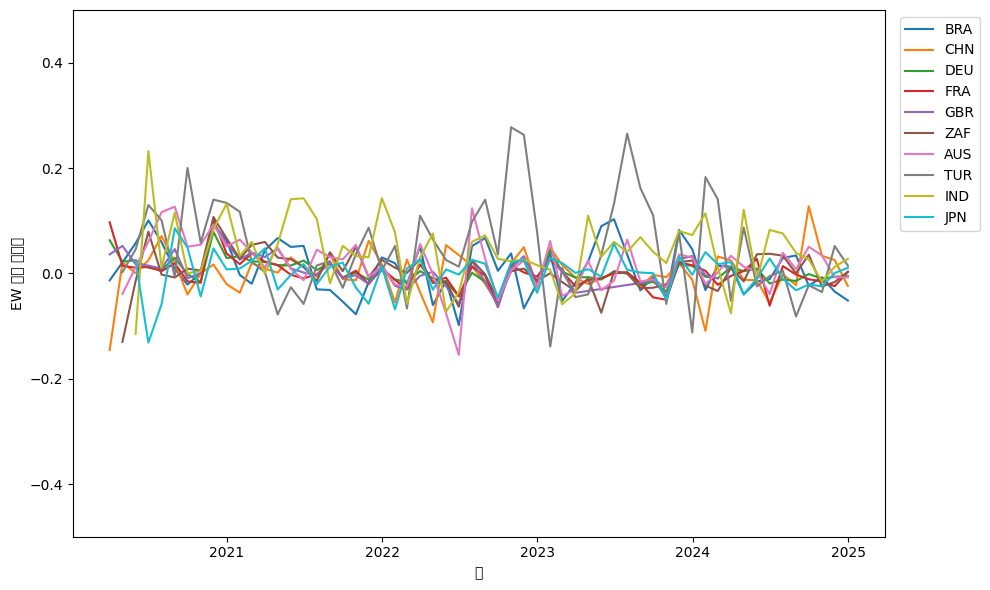

In [134]:
# datadate가 날짜형이면 변환, 아니면 생략
ew_ret['datadate'] = pd.to_datetime(ew_ret['datadate'], errors='coerce')

# 0.5 이상/이하 극단값 제외한 데이터만 선택
plot_data = ew_ret[ew_ret['ew_ret'].abs() < 0.5]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['ew_ret'], label=fic)
plt.ylim(-0.5, 0.5)           # y축 제한 필요하면 조정(극단값이 이미 제거되어 -0.2~0.2로 주로 사용)
plt.ylabel("EW 월별 수익률")
plt.xlabel("월")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()



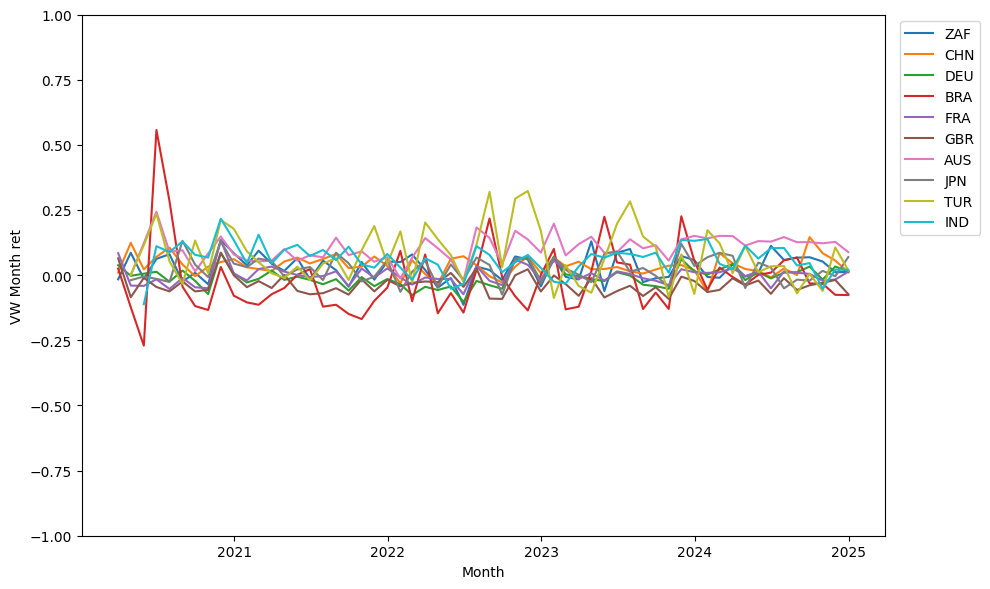

In [135]:
# datadate가 날짜형이면 변환
vw_ret['datadate'] = pd.to_datetime(vw_ret['datadate'], errors='coerce')

# 극단치 제거: VW 수익률이 -0.2~0.2 범위만 사용
plot_data = vw_ret[vw_ret['vw_ret'].abs() < 50]

plt.figure(figsize=(10,6))
for fic in plot_data['fic'].unique():
    temp = plot_data[plot_data['fic'] == fic]
    plt.plot(temp['datadate'], temp['vw_ret'], label=fic)
plt.ylim(-1, 1)
plt.ylabel("VW Month ret")
plt.xlabel("Month")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()

단순히 수익률 공식으로 돌렸더니 프랑스 기업에서는 배당금이 없어서 NaN값이 떴다. 그래서 배당금이 없는 경우 배당금 없이 수익률을 계산하였다.

# 3번 문제

In [136]:
# datadate 컬럼을 datetime 타입으로 변환 (중요!)
data_set['datadate'] = pd.to_datetime(data_set['datadate'])

# 새 컬럼 'period' 생성
def classify_period(date):
    if pd.Timestamp('2020-03-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'COVID-19 Crisis Period'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2024-12-31'):
        return 'Post-crisis Recovery Period'
    else:
        return 'Other'

data_set['period'] = data_set['datadate'].apply(classify_period)

# 결과 예시
print(data_set[['datadate', 'period']].drop_duplicates().head(15))

# 필요시 각 구간별 데이터 분리도 가능
covid_period    = data_set[data_set['period'] == 'COVID-19 Crisis Period']
recovery_period = data_set[data_set['period'] == 'Post-crisis Recovery Period']

         datadate                  period
23656  2020-04-30  COVID-19 Crisis Period
47299  2020-05-31  COVID-19 Crisis Period
71006  2020-06-30  COVID-19 Crisis Period
94795  2020-07-31  COVID-19 Crisis Period
118696 2020-08-31  COVID-19 Crisis Period
142688 2020-09-30  COVID-19 Crisis Period
166790 2020-10-31  COVID-19 Crisis Period
190990 2020-11-30  COVID-19 Crisis Period
215254 2020-12-31  COVID-19 Crisis Period
239774 2021-01-31  COVID-19 Crisis Period
264384 2021-02-28  COVID-19 Crisis Period
289108 2021-03-31  COVID-19 Crisis Period
314151 2021-04-30  COVID-19 Crisis Period
339295 2021-05-31  COVID-19 Crisis Period
364552 2021-06-30  COVID-19 Crisis Period


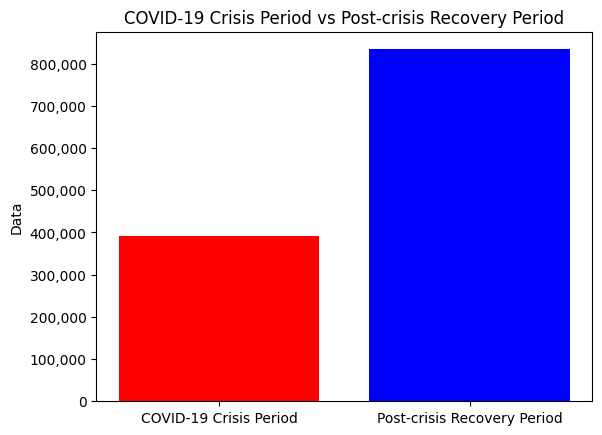

COVID-19 Crisis Period: 392,532개
Post-crisis Recovery Period: 834,180개


In [137]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# 예시 데이터: 이미 covid_period, recovery_period가 존재한다고 가정
count_covid = len(covid_period)
count_recovery = len(recovery_period)

# 막대그래프에 사용할 데이터 이름과 카운트 정의
period_names = ['COVID-19 Crisis Period', 'Post-crisis Recovery Period']
period_counts = [count_covid, count_recovery]

fig, ax = plt.subplots()
ax.bar(period_names, period_counts, color=['red', 'blue'])
ax.set_title('COVID-19 Crisis Period vs Post-crisis Recovery Period')
ax.set_ylabel('Data')

# y축 숫자에 천 단위 콤마 표시
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

print(f"COVID-19 Crisis Period: {count_covid:,}개")
print(f"Post-crisis Recovery Period: {count_recovery:,}개")


# 4번 문제

In [138]:


# 연월(Year-Month) 컬럼 추가
ew_ret['year_month'] = ew_ret['datadate'].dt.to_period('M')
vw_ret['year_month'] = vw_ret['datadate'].dt.to_period('M')

# 피벗(pivot) 테이블 변환
ew_pivot = ew_ret.pivot(index='fic', columns='year_month', values='ew_ret').reset_index()
vw_pivot = vw_ret.pivot(index='fic', columns='year_month', values='vw_ret').reset_index()

# 결측치 그룹별 중앙값으로 대체 함수
def fillna_median_by_group(df, group_col, target_col):
    return df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))

# 동등가중 및 시가총액가중 수익률 결측치 보정
ew_ret['ew_ret'] = fillna_median_by_group(ew_ret, 'fic', 'ew_ret')
vw_ret['vw_ret'] = fillna_median_by_group(vw_ret, 'fic', 'vw_ret')

print("EW 수익률 (국가별 1행, 월별 열):")
print(ew_pivot.head(10))

print("\nVW 수익률 (국가별 1행, 월별 열):")
print(vw_pivot.head(10))

EW 수익률 (국가별 1행, 월별 열):
year_month  fic 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09  \
0           AUS     NaN  -0.039   0.012   0.060   0.116   0.127   0.051   
1           BRA  -0.013   0.021   0.057   0.101   0.059   0.009  -0.021   
2           CHN  -0.146   0.020   0.001   0.025   0.071   0.021  -0.040   
3           DEU   0.063   0.022   0.025   0.011   0.007   0.030  -0.002   
4           FRA   0.097   0.014   0.011   0.012   0.004   0.019  -0.015   
5           GBR   0.036   0.052   0.017   0.015   0.009   0.046  -0.009   
6           IND     NaN     NaN  -0.115   0.232   0.011   0.115   0.000   
7           JPN     NaN     NaN   0.025  -0.131  -0.059   0.086   0.049   
8           TUR     NaN   0.002   0.046   0.130   0.101  -0.006   0.200   
9           ZAF     NaN  -0.130  -0.014   0.079  -0.002  -0.008   0.009   

year_month 2020-10 2020-11  ... 2024-03 2024-04 2024-05 2024-06 2024-07  \
0            0.054   0.093  ...   0.033   0.013   0.004  -0.039   0.039   
1

/tmp/ipython-input-4129610698.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))
/tmp/ipython-input-4129610698.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))
/tmp/ipython-input-4129610698.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the fu

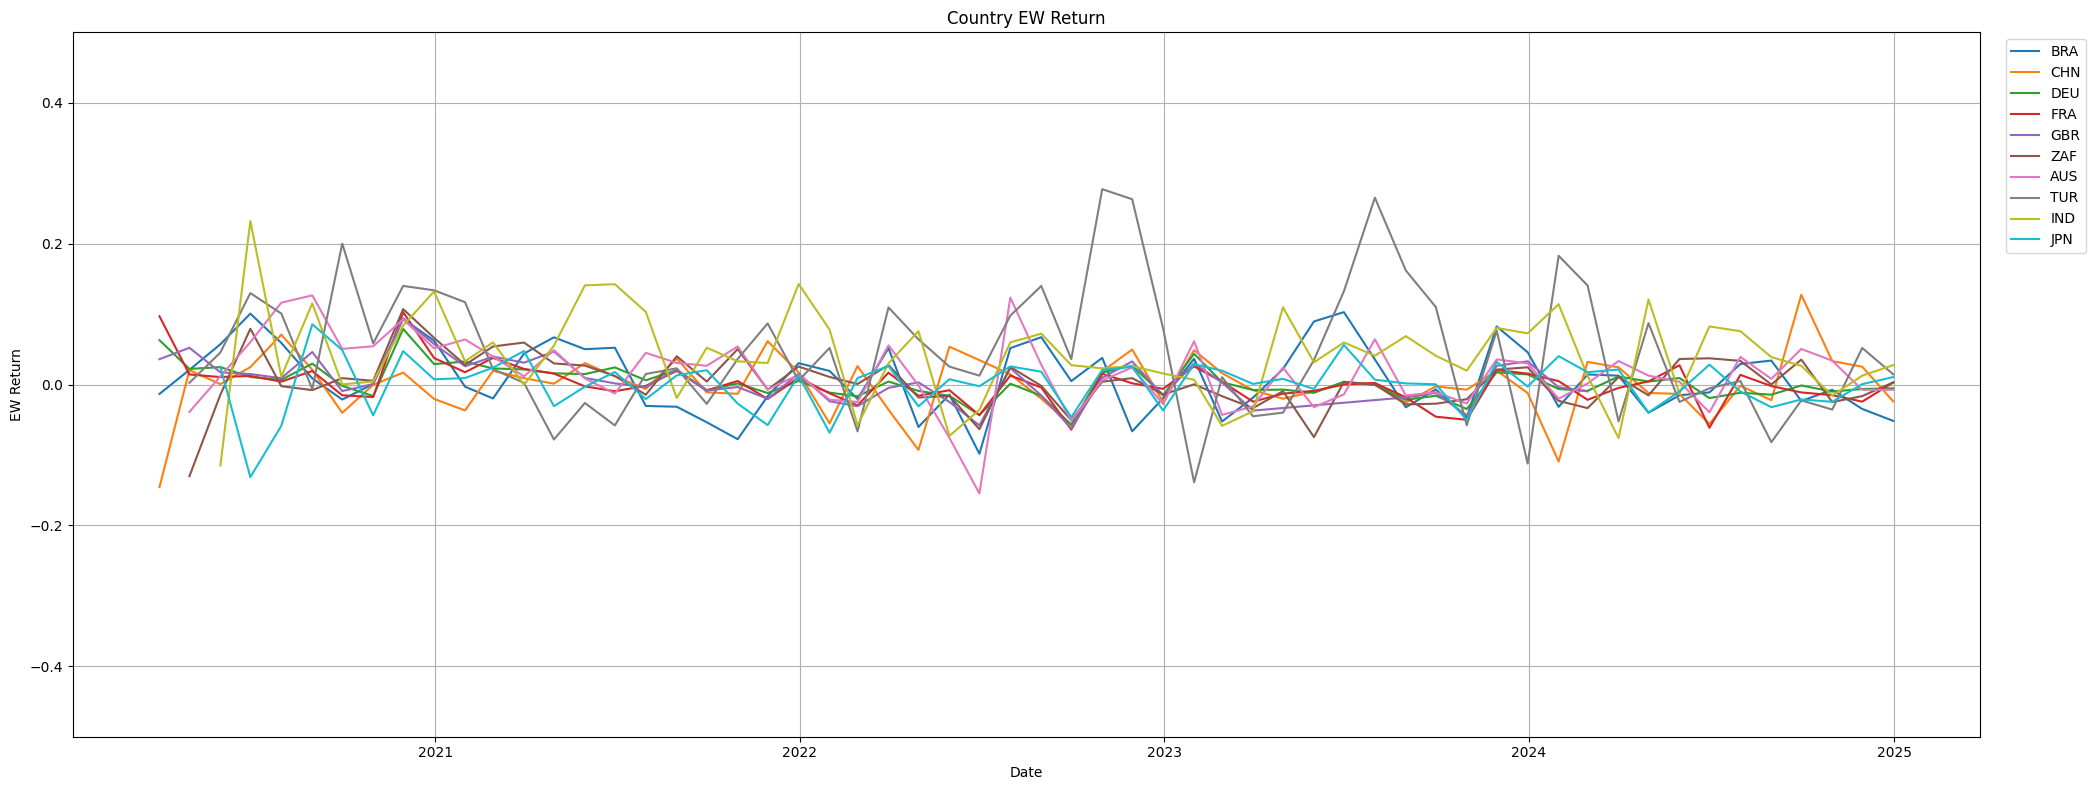

In [139]:
plt.figure(figsize=(20, 8))

# 극단치 제거: EW 수익률이 -0.5 ~ 0.5인 데이터만 사용
ew_ret_clipped = ew_ret[ew_ret['ew_ret'].abs() < 0.5]

for country in ew_ret_clipped['fic'].unique():
    country_data = ew_ret_clipped[ew_ret_clipped['fic'] == country]
    plt.plot(country_data['datadate'], country_data['ew_ret'], label=country)

plt.xlabel('Date')
plt.ylabel('EW Return')
plt.title('Country EW Return')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()

plt.ylim(-0.5, 0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

plt.show()

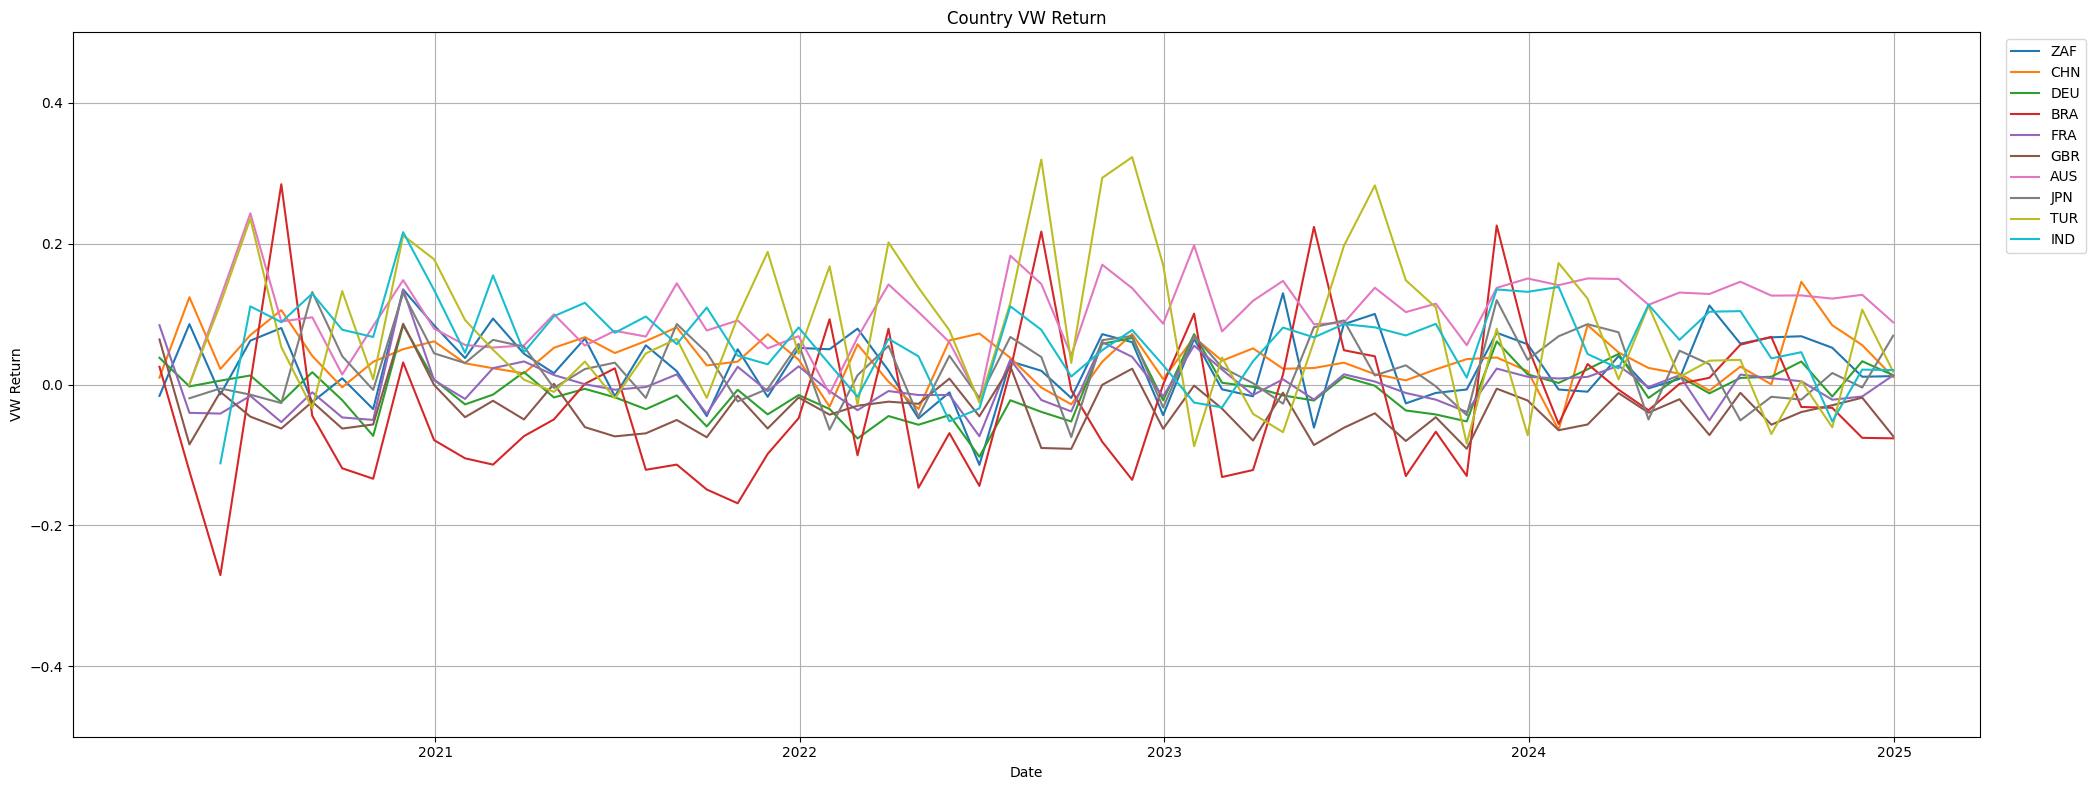

In [140]:
plt.figure(figsize=(20, 8))

# 극단치 제거: VW 수익률이 -0.5 ~ 0.5인 데이터만 사용
vw_ret_clipped = vw_ret[vw_ret['vw_ret'].abs() < 0.5]

for country in vw_ret_clipped['fic'].unique():
    country_data = vw_ret_clipped[vw_ret_clipped['fic'] == country]
    plt.plot(country_data['datadate'], country_data['vw_ret'], label=country)

plt.xlabel('Date')
plt.ylabel('VW Return')
plt.title('Country VW Return')
plt.grid(True)
plt.tight_layout()

plt.ylim(-0.5, 0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2)

plt.show()

In [141]:
from scipy.stats import skew, kurtosis


# summary statistics 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

# 그룹별 summary stat 계산 (data_10 대신 data_set 기반)
ew_stats = ew_ret.groupby('fic')['ew_ret'].apply(calc_summary_stats).reset_index()
vw_stats = vw_ret.groupby('fic')['vw_ret'].apply(calc_summary_stats).reset_index()


In [143]:
# 원본 ew_stats 테이블 구조를 표 형태(행: 국가, 열: 요약통계)로 변환
ew_stats_table = ew_stats.pivot(index='fic', columns='level_1', values='ew_ret')

# 보기 좋은 소수점 자리수 지정
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# 원하는 순서를 이 리스트에 적으면 됨
desired_order = ['mean', 'median', 'std', 'min', 'max', 'autocorr', 'skewness', 'excess_kurtosis']

# 표 컬럼 순서 맞추기 (없는 항목은 무시, 실제 있는 항목만 자동 포함)
ew_stats_table = ew_stats_table.reindex(columns=desired_order)

print(ew_stats_table)

level_1   mean  median   std    min   max  autocorr  skewness  excess_kurtosis
fic                                                                           
AUS      0.015   0.013 0.048 -0.155 0.127     0.184    -0.346            1.750
BRA      0.008   0.003 0.047 -0.098 0.103     0.294     0.092           -0.681
CHN     -0.000   0.001 0.043 -0.146 0.127    -0.036    -0.575            2.518
DEU      0.003   0.001 0.023 -0.057 0.079     0.264     0.557            1.751
FRA      0.001   0.001 0.029 -0.064 0.103     0.122     0.895            3.384
GBR      0.006   0.003 0.031 -0.062 0.094     0.314     0.166            0.325
IND      0.041   0.033 0.063 -0.115 0.232    -0.115     0.161            0.682
JPN      0.000   0.007 0.036 -0.131 0.086    -0.074    -0.842            1.921
TUR      0.047   0.035 0.092 -0.139 0.277     0.287     0.520            0.036
ZAF      0.004   0.003 0.038 -0.130 0.107     0.266    -0.399            2.257


In [144]:

# summary statistics 함수 정의
def calc_summary_stats(x):
    return pd.Series({
        'mean': x.mean(),
        'median': x.median(),
        'std': x.std(),
        'min': x.min(),
        'max': x.max(),
        'autocorr': x.autocorr(lag=1),
        'skewness': skew(x.dropna()),
        'excess_kurtosis': kurtosis(x.dropna(), fisher=True)
    })

covid_period = data_set[data_set['period'] == 'COVID-19 Crisis Period']
recovery_period = data_set[data_set['period'] == 'Post-crisis Recovery Period']

# 각 기간별 수치형 변수 컬럼 선택
covid_numeric_cols = covid_period.select_dtypes(include='number').columns
recovery_numeric_cols = recovery_period.select_dtypes(include='number').columns

# 기간별 수치형 변수들에 대해 함수 적용
covid_stats = covid_period[covid_numeric_cols].apply(calc_summary_stats)
recovery_stats = recovery_period[recovery_numeric_cols].apply(calc_summary_stats)

# 결과 출력
print("COVID-19 Crisis Period 수치형 변수 전체 요약 통계량:")
print(covid_stats)

print("\nPost-crisis Recovery Period 수치형 변수 전체 요약 통계량:")
print(recovery_stats)

COVID-19 Crisis Period 수치형 변수 전체 요약 통계량:
                    ajexm      ajpm        cshtrm      prccm      prchm  \
mean                1.566     1.329    155203.579   1066.841   1113.410   
median              1.000     1.000      6117.829     15.200     16.520   
std                19.693    19.391    633847.116  15715.210  16185.619   
min                 0.000     0.000         0.001      0.000      0.000   
max              3000.000  3000.000 112043152.600 812000.000 829000.000   
autocorr            0.937     0.924         0.776      0.944      0.943   
skewness          144.514   151.090        34.483     31.703     31.649   
excess_kurtosis 21915.658 23315.221      3434.767   1178.689   1173.982   

                     prclm    dvpspm    dvpsxm  prccm_adj  prccm_adj_prev  \
mean              1015.791     2.438     2.650   1054.945        1048.346   
median              14.050     0.000     0.000     14.640          14.540   
std              15063.384   117.437   122.855  1571

In [145]:

# CSV 파일로 저장
covid_stats.to_csv('covid_stats.csv', index=False)

In [128]:
# 1. 요약통계 계산
covid_stats = covid_period[covid_numeric_cols].apply(calc_summary_stats)

# 2. summary 통계가 열에 오도록 transpose
covid_stats = covid_stats.T

# 3. 원하는 열 순서 지정
desired_order = ['mean', 'median', 'std', 'min', 'max', 'autocorr', 'skewness', 'excess_kurtosis']
covid_stats = covid_stats[desired_order]  # columns만 순서 맞추기

# 4. 출력
print(covid_stats)

                      mean     median          std    min            max  \
ajexm                1.576      1.000       19.808  0.000       3000.000   
ajpm                 1.333      1.000       19.493  0.000       3000.000   
cshtrm          153357.288   5955.215   629536.219  0.001  112043152.600   
prccm             1069.997     15.200    15673.365  0.000     812000.000   
prchm             1118.335     16.525    16171.835  0.000     829000.000   
prclm             1018.828     14.026    15028.499  0.000     783000.000   
dvpspm               2.575      0.000      117.662  0.000      15384.000   
dvpsxm               2.673      0.000      124.088  0.000      15384.000   
prccm_adj         1058.108     14.610    15672.300  0.000     812000.000   
prccm_adj_prev    1053.372     14.540    15559.804  0.000     812000.000   
div                  2.673      0.000      124.088  0.000      15384.000   
ret                  0.023      0.000        0.174 -0.996          1.500   
mktcap      

# 5번 문제

In [129]:
# Developed/Emerging 국가 리스트
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

data_10['group'] = data_10['fic'].apply(
    lambda x: 'Developed' if x in developed else ('Emerging' if x in emerging else np.nan))
filtered = data_10[data_10['group'].notnull()]

# EW 수익률 계산 (datadate별)
ew_ret = filtered.groupby(['group', 'fic', 'datadate'], as_index=False)['ret'].mean()
ew_ret = ew_ret.rename(columns={'ret': 'ew_ret'})

# VW 수익률 계산 (datadate별)
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond, 'ret'], weights=x.loc[cond, 'mktcap'])
    else:
        return np.nan

vw_ret = filtered.groupby(['group', 'fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# ---- summary statistics 함수 정의 (agg 활용) ---- #
summary_funcs = {
    'mean': 'mean',
    'median': 'median',
    'std': 'std',
    'min': 'min',
    'max': 'max',
    'autocorr': lambda x: x.autocorr(lag=1) if len(x.dropna()) > 1 else np.nan,
    'skewness': lambda x: skew(x.dropna()) if len(x.dropna()) > 2 else np.nan,
    'excess_kurtosis': lambda x: kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else np.nan
}

ew_stats = ew_ret.groupby(['group', 'fic'])['ew_ret'].agg(**summary_funcs).reset_index()
vw_stats = vw_ret.groupby(['group', 'fic'])['vw_ret'].agg(**summary_funcs).reset_index()

ew_stats = ew_stats.replace([np.inf, -np.inf], np.nan).dropna() #inf, -inf 값을 NaN으로 대체 후 Nan 전체 제거
vw_stats = vw_stats.replace([np.inf, -np.inf], np.nan).dropna()

print("EW summary 국가별 샘플", ew_stats.head())
print("VW summary 국가별 샘플", vw_stats.head())

# 그룹별 평균 summary stats (Developed/Emerging)
ew_stats_grp = ew_stats.groupby('group').mean(numeric_only=True)
vw_stats_grp = vw_stats.groupby('group').mean(numeric_only=True)
print("EW 그룹별 평균 summary stats:")
print(ew_stats_grp)
print("VW 그룹별 평균 summary stats:")
print(vw_stats_grp)

NameError: name 'data_10' is not defined

In [ ]:
# Developed/Emerging 국가 리스트
developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

# group 컬럼 추가 (data_set에서 바로 적용)
data_set['group'] = data_set['fic'].apply(
    lambda x: 'Developed' if x in developed else ('Emerging' if x in emerging else np.nan)
)
filtered = data_set[data_set['group'].notnull()]

# EW 수익률 계산 (datadate별)
ew_ret = filtered.groupby(['group', 'fic', 'datadate'], as_index=False)['ret'].mean()
ew_ret = ew_ret.rename(columns={'ret': 'ew_ret'})

# VW 수익률 계산 (datadate별)
def vw_avg(x):
    cond = (x['mktcap'] > 0) & x['ret'].notnull()
    if cond.any():
        return np.average(x.loc[cond, 'ret'], weights=x.loc[cond, 'mktcap'])
    else:
        return np.nan

vw_ret = filtered.groupby(['group', 'fic', 'datadate']).apply(vw_avg).reset_index(name='vw_ret')

# summary statistics 함수 정의 (agg 활용)
summary_funcs = {
    'mean': 'mean',
    'median': 'median',
    'std': 'std',
    'min': 'min',
    'max': 'max',
    'autocorr': lambda x: x.autocorr(lag=1) if len(x.dropna()) > 1 else np.nan,
    'skewness': lambda x: skew(x.dropna()) if len(x.dropna()) > 2 else np.nan,
    'excess_kurtosis': lambda x: kurtosis(x.dropna(), fisher=True) if len(x.dropna()) > 3 else np.nan
}

ew_stats = ew_ret.groupby(['group', 'fic'])['ew_ret'].agg(**summary_funcs).reset_index()
vw_stats = vw_ret.groupby(['group', 'fic'])['vw_ret'].agg(**summary_funcs).reset_index()

ew_stats = ew_stats.replace([np.inf, -np.inf], np.nan).dropna()
vw_stats = vw_stats.replace([np.inf, -np.inf], np.nan).dropna()


# 그룹별 평균 summary stats (Developed/Emerging)
ew_stats_grp = ew_stats.groupby('group').mean(numeric_only=True)
vw_stats_grp = vw_stats.groupby('group').mean(numeric_only=True)

print("EW 그룹별 평균 summary stats:")
print(ew_stats_grp.head(10))
print("VW 그룹별 평균 summary stats:")
print(vw_stats_grp.head(10))



# 6번 문제

In [ ]:
# 국가, 월별 수익률 피벗테이블 생성
pivot = data_set.pivot_table(index='datadate', columns='fic', values='ret')


# 기간 구분
periods = {
    'covid_crisis': ('2020-03', '2021-12'),
    'post_recovery': ('2022-01', '2024-12')
}

developed = ['GBR', 'DEU', 'JPN', 'FRA', 'AUS']
emerging = ['CHN', 'IND', 'BRA', 'ZAF', 'TUR']

corr_matrices = {}
for label, (start, end) in periods.items():
    mask = (pivot.index >= start) & (pivot.index <= end)
    corr_matrices[label] = pivot.loc[mask].corr()
    print(f"\n[{label} 기간 국가별 상관행렬]:")
    print(corr_matrices[label])

    dev_corr = corr_matrices[label].loc[developed, developed]
    emg_corr = corr_matrices[label].loc[emerging, emerging]

    dev_vals = dev_corr.values[np.triu_indices(len(developed), 1)]
    emg_vals = emg_corr.values[np.triu_indices(len(emerging), 1)]

    print(f"[{label}] 선진국 평균 상관계수: {np.nanmean(dev_vals):.3f}")
    print(f"[{label}] 신흥국 평균 상관계수: {np.nanmean(emg_vals):.3f}")

# 7번 문제